In [ ]:
'''
%matplotlib inline

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image, ImageOps
import scipy
import matplotlib

root_dir = '/home/team12/team12/data/gear_images'

dirs = os.listdir(root_dir)
dirs.sort()
dir_map = { key: value for (key, value) in list(zip(dirs, range(len(dirs)))) }
dir_map

for d, i in dir_map.items():
    full_dir = root_dir + '/' + d
    img_files = [f for f in os.listdir(full_dir) if os.path.isfile(os.path.join(full_dir, f))]
    for img_file in img_files:
        full_img_path = full_dir + '/' + img_file
        img=mpimg.imread(full_img_path)
        print(img.shape)
'''  

"\n%matplotlib inline\n\nimport os\nimport matplotlib.pyplot as plt\nimport matplotlib.image as mpimg\nimport numpy as np\nfrom PIL import Image, ImageOps\nimport scipy\nimport matplotlib\n\nroot_dir = '/home/team12/team12/data/gear_images'\n\ndirs = os.listdir(root_dir)\ndirs.sort()\ndir_map = { key: value for (key, value) in list(zip(dirs, range(len(dirs)))) }\ndir_map\n\nfor d, i in dir_map.items():\n    full_dir = root_dir + '/' + d\n    img_files = [f for f in os.listdir(full_dir) if os.path.isfile(os.path.join(full_dir, f))]\n    for img_file in img_files:\n        full_img_path = full_dir + '/' + img_file\n        img=mpimg.imread(full_img_path)\n        print(img.shape)\n"

In [10]:
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split

img_root = '/home/team12/team12/data/gear_images_normalized'
img_dirs = [os.path.join(img_root, o) for o in os.listdir(img_root) if os.path.isdir(os.path.join(img_root,o))]
img_dirs.sort()
x = []
y = []
category = 0
for img_dir in img_dirs:
    print(img_dir + " : " + str(category))
    count = 0
    img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))]
    for img_file in img_files:
        #print(img_dir + '/' + img_file)
        image_path = img_dir + '/' + img_file
        x.append(np.array(Image.open(image_path)))
        y.append(category)
        #if count > 100:
        #    break
        count += 1
    category += 1

X = np.array(x).reshape(len(x), -1)
Y = np.array(y)
print(X.shape)
print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#clf = svm.SVC(decision_function_shape='ovo')
clf = svm.LinearSVC()
clf_result = clf.fit(X_train, y_train)
print(clf_result)
print('Done')

/home/team12/team12/data/gear_images_normalized/axes : 0
/home/team12/team12/data/gear_images_normalized/boots : 1
/home/team12/team12/data/gear_images_normalized/carabiners : 2
/home/team12/team12/data/gear_images_normalized/crampons : 3
/home/team12/team12/data/gear_images_normalized/gloves : 4
/home/team12/team12/data/gear_images_normalized/hardshell_jackets : 5
/home/team12/team12/data/gear_images_normalized/harnesses : 6
/home/team12/team12/data/gear_images_normalized/helmets : 7
/home/team12/team12/data/gear_images_normalized/insulated_jackets : 8
/home/team12/team12/data/gear_images_normalized/pulleys : 9
/home/team12/team12/data/gear_images_normalized/rope : 10
/home/team12/team12/data/gear_images_normalized/tents : 11
(2122, 49152)
(2122,)
(1697, 49152)
(425, 49152)
(1697,)
(425,)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,


In [13]:
from sklearn.externals import joblib

joblib.dump(clf, '/home/team12/team12/data/task3.pkl')

['/home/team12/team12/data/task3.pkl']

In [11]:
desired_size = 128

def process_image(old_im_pth):
    im = Image.open(old_im_pth)
    old_size = im.size
    print(old_size)

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
   
    im = im.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size), 'white')
    new_im.paste(im, ((desired_size-new_size[0])//2,
                     (desired_size-new_size[1])//2))
    return np.array(new_im)

test_path = '/home/team12/team12/data/task3_test.jpeg'
#test_img = mpimg.imread(test_path)
test_img = process_image(test_path)

print(test_img.shape)
print(clf.predict(np.array(test_img.ravel()).reshape(1, -1)))
print(img_dirs[clf.predict(np.array(test_img.ravel()).reshape(1, -1))[0]])

(1200, 1200)
(128, 128, 3)
[7]
/home/team12/team12/data/gear_images_normalized/helmets


Score: 0.8588235294117647


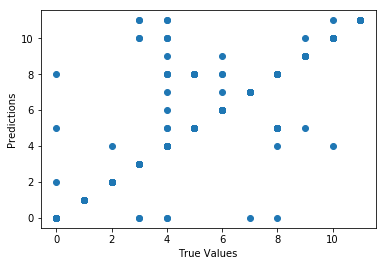

In [12]:
predictions = clf.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

print("Score:", clf.score(X_test, y_test))

In [32]:
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn import linear_model

img_root = '/home/team12/team12/data/gear_images_all'
#img_root = '/home/team12/team12/data/gear_images_normalized'
#img_root = '/home/team12/team12/data/gear_images_equalize'
img_dirs = [os.path.join(img_root, o) for o in os.listdir(img_root) if os.path.isdir(os.path.join(img_root,o))]
img_dirs.sort()
x = []
y = []
category = 0
for img_dir in img_dirs:
    print(img_dir + " : " + str(category))
    count = 0
    img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))]
    for img_file in img_files:
        #print(img_dir + '/' + img_file)
        image_path = img_dir + '/' + img_file
        x.append(np.array(Image.open(image_path)))
        y.append(category)
        #if count > 100:
        #    break
        count += 1
    category += 1

X = np.array(x).reshape(len(x), -1)
Y = np.array(y)
print(X.shape)
print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#clf = svm.SVC(decision_function_shape='ovo')
#clf = svm.LinearSVC()
clf = linear_model.SGDClassifier(epsilon=0.0001)
clf_result = clf.fit(X_train, y_train)
print(clf_result)
print('Done')

/home/team12/team12/data/gear_images_all/axes : 0
/home/team12/team12/data/gear_images_all/boots : 1
/home/team12/team12/data/gear_images_all/carabiners : 2
/home/team12/team12/data/gear_images_all/crampons : 3
/home/team12/team12/data/gear_images_all/gear_images_normalized : 4
/home/team12/team12/data/gear_images_all/gloves : 5
/home/team12/team12/data/gear_images_all/hardshell_jackets : 6
/home/team12/team12/data/gear_images_all/harnesses : 7
/home/team12/team12/data/gear_images_all/helmets : 8
/home/team12/team12/data/gear_images_all/insulated_jackets : 9
/home/team12/team12/data/gear_images_all/pulleys : 10
/home/team12/team12/data/gear_images_all/rope : 11
/home/team12/team12/data/gear_images_all/tents : 12
(2122, 49152)
(2122,)
(1697, 49152)
(425, 49152)
(1697,)
(425,)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.0001,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Done


Score: 0.7294117647058823


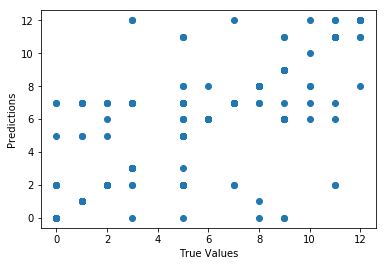

In [33]:
predictions = clf.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

print("Score:", clf.score(X_test, y_test))